In [1]:
import pandas as pd
from pathlib import Path

In [2]:
code_dir = Path.cwd()
ipt_dir = Path(code_dir.parent, 'in')
otpt_dir = Path(code_dir.parent, 'out')

In [3]:
df = pd.read_csv(Path(ipt_dir, 'Account.csv'), encoding='shift-jis', skiprows=1, index_col=0)
df

,分類,基準価額(円),口数,個別元本(円),取得単価(円),評価損益(円),評価損益率(％),評価額(円),口座区分
ファンド名,,,,,,,,,
ｅＭＡＸＩＳ ＮＹダウインデックス,累投,31786,116439,20613,20612,130109,54.2,370113,特定
ｅＭＡＸＩＳ Ｓｌｉｍ 先進国株式インデックス,累投,20490,1285232,17273,17274,413331,18.6,2633440,特定
ｅＭＡＸＩＳ Ｓｌｉｍ 米国株式（Ｓ＆Ｐ５００）,累投,19627,1045438,16261,16262,351790,20.7,2051881,特定
ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー）,累投,17263,3384520,15069,15069,742564,14.6,5842697,特定
グローバル・ヘルスケア＆バイオ・オープンＢ（為替ヘッジなし）,累投,68343,72899,42922,42911,185397,59.3,498214,特定
グローバル株式インカム（毎月決算型）,累投,12264,1982246,8052,8052,834922,52.3,2431026,特定


In [15]:
# 取得総額あたりの利益率を知りたい
df2 = df.iloc[:, [5,7]]
df2

,評価損益(円),評価額(円)
ファンド名,,
ｅＭＡＸＩＳ ＮＹダウインデックス,130109,370113
ｅＭＡＸＩＳ Ｓｌｉｍ 先進国株式インデックス,413331,2633440
ｅＭＡＸＩＳ Ｓｌｉｍ 米国株式（Ｓ＆Ｐ５００）,351790,2051881
ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー）,742564,5842697
グローバル・ヘルスケア＆バイオ・オープンＢ（為替ヘッジなし）,185397,498214
グローバル株式インカム（毎月決算型）,834922,2431026


In [16]:
# 利益率を出す
df2.columns = ['利益', '総額']
df2

,利益,総額
ファンド名,,
ｅＭＡＸＩＳ ＮＹダウインデックス,130109,370113
ｅＭＡＸＩＳ Ｓｌｉｍ 先進国株式インデックス,413331,2633440
ｅＭＡＸＩＳ Ｓｌｉｍ 米国株式（Ｓ＆Ｐ５００）,351790,2051881
ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー）,742564,5842697
グローバル・ヘルスケア＆バイオ・オープンＢ（為替ヘッジなし）,185397,498214
グローバル株式インカム（毎月決算型）,834922,2431026


In [17]:
df2['利益率'] = df2['利益']/df2['総額'] * 100
df2

/tmp/ipykernel_2414/2041291343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['利益率'] = df2['利益']/df2['総額'] * 100


,利益,総額,利益率
ファンド名,,,
ｅＭＡＸＩＳ ＮＹダウインデックス,130109,370113,35.153858
ｅＭＡＸＩＳ Ｓｌｉｍ 先進国株式インデックス,413331,2633440,15.695478
ｅＭＡＸＩＳ Ｓｌｉｍ 米国株式（Ｓ＆Ｐ５００）,351790,2051881,17.144756
ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー）,742564,5842697,12.709268
グローバル・ヘルスケア＆バイオ・オープンＢ（為替ヘッジなし）,185397,498214,37.212322
グローバル株式インカム（毎月決算型）,834922,2431026,34.344429


In [18]:
df2 = df2.sort_values('利益率', ascending=False)
df2

,利益,総額,利益率
ファンド名,,,
グローバル・ヘルスケア＆バイオ・オープンＢ（為替ヘッジなし）,185397,498214,37.212322
ｅＭＡＸＩＳ ＮＹダウインデックス,130109,370113,35.153858
グローバル株式インカム（毎月決算型）,834922,2431026,34.344429
ｅＭＡＸＩＳ Ｓｌｉｍ 米国株式（Ｓ＆Ｐ５００）,351790,2051881,17.144756
ｅＭＡＸＩＳ Ｓｌｉｍ 先進国株式インデックス,413331,2633440,15.695478
ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー）,742564,5842697,12.709268


In [19]:
# 単純な利益率でいうと先進国株、グローバル株式インカムがよい
# オールカントリーに振りすぎている嫌いはある
# 総額の割合は？
df2['投入金額割合'] = df2['総額']/sum(df2['総額'])
df2

,利益,総額,利益率,投入金額割合
ファンド名,,,,
グローバル・ヘルスケア＆バイオ・オープンＢ（為替ヘッジなし）,185397,498214,37.212322,0.036031
ｅＭＡＸＩＳ ＮＹダウインデックス,130109,370113,35.153858,0.026767
グローバル株式インカム（毎月決算型）,834922,2431026,34.344429,0.175813
ｅＭＡＸＩＳ Ｓｌｉｍ 米国株式（Ｓ＆Ｐ５００）,351790,2051881,17.144756,0.148393
ｅＭＡＸＩＳ Ｓｌｉｍ 先進国株式インデックス,413331,2633440,15.695478,0.190451
ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー）,742564,5842697,12.709268,0.422546


In [20]:
# 投入金額の割合に対する利益率は？
df2['利益率/投入金額'] = df2['利益率']/df2['投入金額割合']*100
df2.sort_values('利益率/投入金額', ascending=False)

,利益,総額,利益率,投入金額割合,利益率/投入金額
ファンド名,,,,,
ｅＭＡＸＩＳ ＮＹダウインデックス,130109,370113,35.153858,0.026767,131334.333677
グローバル・ヘルスケア＆バイオ・オープンＢ（為替ヘッジなし）,185397,498214,37.212322,0.036031,103278.628825
グローバル株式インカム（毎月決算型）,834922,2431026,34.344429,0.175813,19534.680517
ｅＭＡＸＩＳ Ｓｌｉｍ 米国株式（Ｓ＆Ｐ５００）,351790,2051881,17.144756,0.148393,11553.638251
ｅＭＡＸＩＳ Ｓｌｉｍ 先進国株式インデックス,413331,2633440,15.695478,0.190451,8241.205401
ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー）,742564,5842697,12.709268,0.422546,3007.784915


In [21]:
df2.利益.sum()

2658113

In [23]:
df3 = df2.sort_values('投入金額割合', ascending=False)

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='投入金額割合', ylabel='ファンド名'>

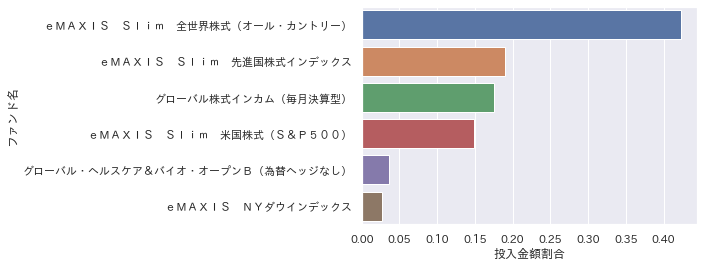

In [30]:
sns.set(font='IPAexGothic')
sns.barplot(x = df3['投入金額割合'], y = df3.index)